The goal of the project is to use the historical data to build a model that can accurately forecast the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set. Accurate demand forecasting can help the company plan the stock of raw materials and staffing of the centers accordingly.

In [ ]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

df = pd.read_csv('/content/train.csv', error_bad_lines=False)

##Importing the data from excel sheet
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv('/content/train.csv', error_bad_lines=False)
import warnings  
warnings.filterwarnings("ignore")


# New Section

**Exploratory Data Analysis**

In this we are trying to understand different relationships that can be useful to run our ML models,It also provides various plots which can provide key Inputs regarding the data. 

In [ ]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [ ]:
meal_info = pd.read_csv('meal_info.csv')
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
import pandas as pd

# Define and load the train DataFrame
train = pd.read_csv('train.csv', error_bad_lines=False)

# Get the unique center_ids in the DataFrame and count the total number
unique_centers = train['center_id'].unique()
total_centers = len(unique_centers)

print(f'Total number of centers: {total_centers}')
print(f'Unique center_ids: {unique_centers}')


<ipython-input-15-6dce19dbc129>:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





Total number of centers: 77
Unique center_ids: [ 55  24  11  83  32  13 109  52  93 186 146  57 149  89 124 152  97  74
 108  99  66  94  91  20  34 137  92 126  36 162  75 177  27 157 106  64
 129  14  17 153 139 161  81  26  73  50 104  42 113 145  53  72  67 174
  29  77  41  30  76  59  88 143  58  10 101  80  43  65  39 102 110 132
  23  86  68  51  61]


**Code for displaying top 10 centr_id based on their order quantity**

In [ ]:
import pandas as pd
import plotly.express as px

# Define and load the train DataFrame
train = pd.read_csv('train.csv', error_bad_lines=False)

# Grouping by center_id and summing the num_orders
center_orders = train.groupby("center_id", as_index=False).sum()
center_orders = center_orders[["center_id", "num_orders"]].sort_values(by="num_orders", ascending=True).head(10)

# Creating a bar chart
fig = px.bar(x=center_orders["center_id"].astype("str"), y=center_orders["num_orders"],
             title="Top 10 Centers by Order", labels={"x": "center_id", "y": "num_orders"},
             hover_name=center_orders["center_id"].astype("str"), # Show center_id on hover
             hover_data={"num_orders": center_orders["num_orders"]}) # Show num_orders on hover

# Set text to display inside the bars
fig.update_traces(text=center_orders["num_orders"], textposition='inside',
                  marker=dict(color='green')) # Set bar color to green

fig.show()




<ipython-input-12-390a37a5248d>:5: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





Breakdown of different food served in the top 10 centre_id 

In [ ]:
import pandas as pd
import plotly.express as px

# Load File 1 (train.csv) DataFrame
center_orders = pd.read_csv('train.csv',error_bad_lines=False)

# Load File 2 (meal_info.csv) DataFrame
meal_info = pd.read_csv('meal_info.csv',error_bad_lines=False)

# Sort center_orders by num_orders in descending order
sorted_center_orders = center_orders.sort_values(by='num_orders', ascending=False)

# Get top 10 center_ids
top_10_center_ids = sorted_center_orders['center_id'].head(10)

# Create an empty list to store figures for each center
figs = []

# Loop over the top 10 center_ids
for center_id in top_10_center_ids:
    # Filter center_orders for center_id
    center_orders_filtered = center_orders[center_orders['center_id'] == center_id]
    
    # Merge center_orders_filtered with meal_info based on meal_id
    merged_data = pd.merge(center_orders_filtered, meal_info, on='meal_id')
    
    # Group by category, and summing the num_orders
    grouped_data = merged_data.groupby(['category']).agg({'num_orders': 'sum'}).reset_index()
    
    # Calculate total num_orders for the center
    total_num_orders = grouped_data['num_orders'].sum()
    
    # Calculate percentage of num_orders for each category in the center
    grouped_data['percentage'] = (grouped_data['num_orders'] / total_num_orders) * 100
    
    # Plotting the percentage breakdown of category for the center
    fig = px.pie(grouped_data, values='percentage', names='category', title=f'Percentage Breakdown of Category for Center {center_id}')
    figs.append(fig)

# Displaying the figures
for fig in figs:
    fig.show()



<ipython-input-22-61f612626657>:5: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



<ipython-input-22-61f612626657>:8: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





Correlation Matrix for the different features 

In [ ]:
import pandas as pd
import plotly.express as px

# Load File 1 (train.csv) DataFrame
center_orders = pd.read_csv('train.csv', error_bad_lines=False)

# Select columns for correlation matrix
cols = ['week', 'center_id', 'meal_id', 'checkout_price', 'base_price']
corr_data = center_orders[cols]

# Calculate correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap of correlation matrix
fig = px.imshow(corr_matrix, color_continuous_scale='RdBu', title='Correlation Matrix')
fig.show()


<ipython-input-23-d9c1998ebd7a>:5: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





Plot for Num of orders and diferrent weeks for a given Meal and Centre ID

In [ ]:
import pandas as pd
import plotly.express as px

# Load File 1 (train.csv) DataFrame
center_orders = pd.read_csv('train.csv', error_bad_lines=False)

# Select a specific center_id and meal_id
center_id = 13
meal_id = 1062

# Filter center_orders for selected center_id and meal_id
filtered_data = center_orders[(center_orders['center_id'] == center_id) & (center_orders['meal_id'] == meal_id)]

# Group by week and summing the num_orders
grouped_data = filtered_data.groupby('week').agg({'num_orders': 'sum'}).reset_index()

# Plotting the graph of num_orders for the selected center_id and meal_id
fig = px.line(grouped_data, x='week', y='num_orders', title=f'Num of Orders for Center {center_id}, Meal {meal_id}')

# Customize plot layout to fit the graph
fig.update_layout(
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
    paper_bgcolor="white",
)

fig.show()

<ipython-input-1-5deedf365fa6>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  center_orders = pd.read_csv('train.csv', error_bad_lines=False)


It can be seen from the graph that it is mixture of seasonality trend and Noise.Let us implement the ARIMA model to study the above time series

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import statsmodels.api as sm

# Load File 1 (train.csv) DataFrame
center_orders = pd.read_csv('train.csv', error_bad_lines=False)

# Select a specific center_id and meal_id
center_id = 13
meal_id = 1062

# Filter center_orders for selected center_id and meal_id
filtered_data = center_orders[(center_orders['center_id'] == center_id) & (center_orders['meal_id'] == meal_id)]

# Group by week and summing the num_orders
grouped_data = filtered_data.groupby('week').agg({'num_orders': 'sum'}).reset_index()

# Perform seasonal decomposition of the time series
result = sm.tsa.seasonal_decompose(grouped_data.set_index('week').num_orders, model='additive', period=52)

# Plot the trend component
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=result.trend.index, y=result.trend.values, name='Trend'))
fig1.update_layout(title=f'Trend Component for Center {center_id}, Meal {meal_id}')

# Plot the seasonal component
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal.values, name='Seasonality'))
fig2.update_layout(title=f'Seasonality Component for Center {center_id}, Meal {meal_id}')

# Plot the residual component
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=result.resid.index, y=result.resid.values, name='Residual'))
fig3.update_layout(title=f'Residual Component for Center {center_id}, Meal {meal_id}')

# Customize plot layouts to fit the graphs
fig1.update_layout(
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
    paper_bgcolor="white",
)

fig2.update_layout(
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
    paper_bgcolor="white",
)

fig3.update_layout(
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
    paper_bgcolor="white",
)

# Show the plots
fig1.show()
fig2.show()
fig3.show()



<ipython-input-26-1baaa60bff1e>:6: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





Grid search to find the ideal value of p.d,q

In [ ]:
import pandas as pd
import numpy as np
from itertools import product
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

df = pd.read_csv('/content/train.csv', error_bad_lines=False)

# Load File 1 (train.csv) DataFrame
center_orders = pd.read_csv('train.csv')

# Define the center_id and meal_id to use for modeling
center_id = 13
meal_id = 1062

# Filter center_orders for selected center_id and meal_id
filtered_data = center_orders[(center_orders['center_id'] == center_id) & (center_orders['meal_id'] == meal_id)]

# Group by week and summing the num_orders
grouped_data = filtered_data.groupby('week').agg({'num_orders': 'sum'}).reset_index()

# Split the data into training and validation sets
train_data = grouped_data.loc[grouped_data['week'] <= 135]
val_data = grouped_data.loc[grouped_data['week'] > 135]

# Define the parameter space to search over
ps = range(0, 6)
ds = range(1, 6)
qs = range(0, 6)
params = product(ps, ds, qs)

# Perform a grid search over the parameter space
best_rmse = np.inf
best_params = None
for param in params:
    try:
        # Fit an ARIMA model to the training data with the current parameter values
        model = ARIMA(train_data['num_orders'], order=param)
        model_fit = model.fit()

        # Generate predictions for the validation set
        start = len(train_data)
        end = len(train_data) + len(val_data) - 1
        predictions = model_fit.predict(start=start, end=end, typ='levels')

        # Calculate the Root Mean Squared Error (RMSE) of the predictions
        mse = ((predictions - val_data['num_orders']) ** 2).mean()
        rmse = mse ** 0.5

        # Update the best parameters and RMSE if the current model has better performance
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = param
            
    except:
        continue

# Print the best parameters and RMSE
print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_rmse:.2f}")

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA par

Best parameters: (5, 2, 2)
Best RMSE: 124.57


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Implementing ARIMA model

<ipython-input-28-73a118e0b4ac>:6: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



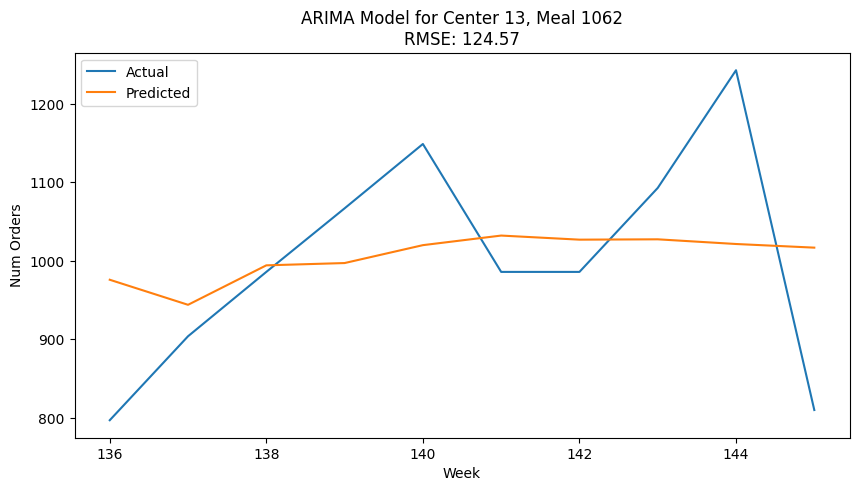

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load File 1 (train.csv) DataFrame
center_orders = pd.read_csv('train.csv', error_bad_lines=False)

# Select a specific center_id and meal_id
center_id = 13
meal_id = 1062

# Filter center_orders for selected center_id and meal_id
filtered_data = center_orders[(center_orders['center_id'] == center_id) & (center_orders['meal_id'] == meal_id)]

# Group by week and summing the num_orders
grouped_data = filtered_data.groupby('week').agg({'num_orders': 'sum'}).reset_index()

# Split the data into training and validation sets
train_data = grouped_data.loc[grouped_data['week'] <= 135]
val_data = grouped_data.loc[grouped_data['week'] > 135]

# Fit an ARIMA model to the training data
model = ARIMA(train_data['num_orders'], order=(5, 2, 2))
model_fit = model.fit()

# Generate predictions for the validation set
start = len(train_data)
end = len(train_data) + len(val_data) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

# Calculate the Root Mean Squared Error (RMSE) of the predictions
mse = ((predictions - val_data['num_orders']) ** 2).mean()
rmse = mse ** 0.5

# Plot the predicted vs. actual values
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(val_data['week'], val_data['num_orders'], label='Actual')
ax.plot(val_data['week'], predictions, label='Predicted')
ax.set(title=f'ARIMA Model for Center {center_id}, Meal {meal_id}\nRMSE: {rmse:.2f}', xlabel='Week', ylabel='Num Orders')
ax.legend()
plt.show()

In [ ]:
# Generate predictions for the next 10 weeks
next_weeks = 10
start = len(grouped_data) + 1
end = start + next_weeks - 1
next_predictions = model_fit.predict(start=start, end=end, typ='levels')

# Print the predicted values for the next 10 weeks
print('Predictions for the next 10 weeks:')
for i, pred in enumerate(next_predictions):
    print(f'Week {start + i}: {pred:.2f}')


Predictions for the next 10 weeks:
Week 146: 1012.99
Week 147: 1012.47
Week 148: 1011.99
Week 149: 1011.18
Week 150: 1010.50
Week 151: 1009.43
Week 152: 1008.29
Week 153: 1007.15
Week 154: 1005.95
Week 155: 1004.82
